<a href="https://colab.research.google.com/github/princealexanderm/ICT_DAS_Prince_Alex/blob/main/Assignment_Classification_Prince_04_08_24_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment on Classification**

Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the
classification algorithms discussed in the session)

Please note the following:
- Use the iris file attached along with the question. Do not use the iris dataset you already have
with you.
- Mention which model gives the best result in your file and justify your answer.
- Give headings to each step you are doing.
- Keep the file name as your name.

#Answer

Here the classification have been worked out using the following 5 methods
1. Logistic Regression
2. KNN
3. SVM
4. Decision Tree
5. Random forest

Following steps are involved before classifiction
1. Load the data
2. Basic info checking
3. Checking for outlieres
4. Handling outliers
5. Filling missing values if any
6. Scaling
7. Encoding
8. Spliting data into target and independent variable
9. Split data for testing and training
10. Classification method-1: Logistic Regreesion
11. Classification method-2: KNN
12. Classification method-3: SVM
13. Classification method-4: Decision Tree
14. Classification method-5: Random Forest

# 1. Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('/content/iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#2. Basic information checking

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#3. Checking for outliers except target variable

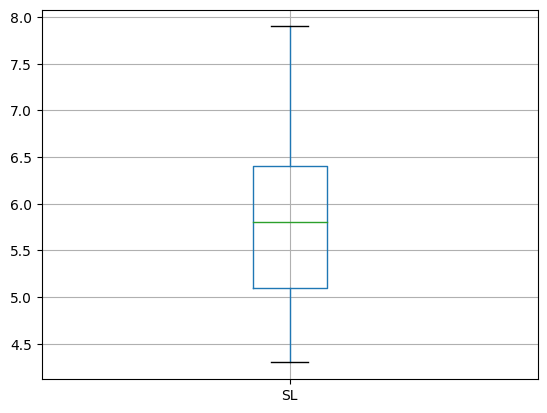

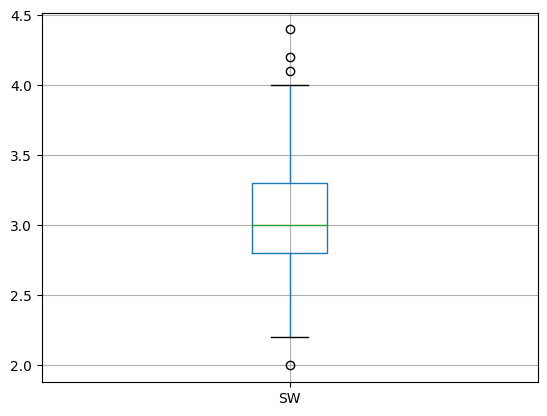

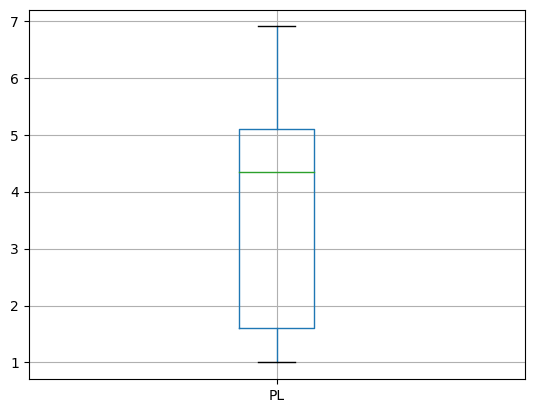

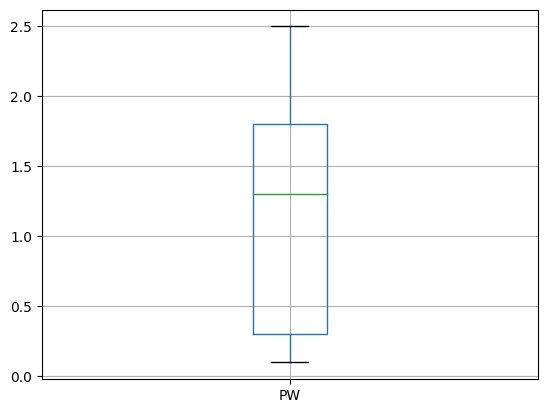

In [7]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    df.boxplot([col])

Outliers in  SW

#4. Handling outliers

In [8]:
#IQR, we have outliers in wine servings and sprit servings

for col in df.columns:
  if df[col].dtype != 'object':
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    #to find iqr
    iqr=q3-q1

    #upper bound and lower bound
    upper=q3+q1+1.5*iqr
    lower=q1-1.5*iqr

    df[col]=np.where(df[col]>upper, upper,df[col])
    #condition, repace with upper, otherwise keep the same value
    df[col]=np.where(df[col]<lower, lower,df[col])

Check again outlies are removed or not

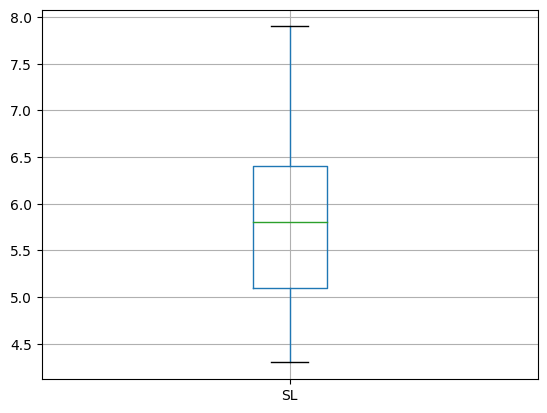

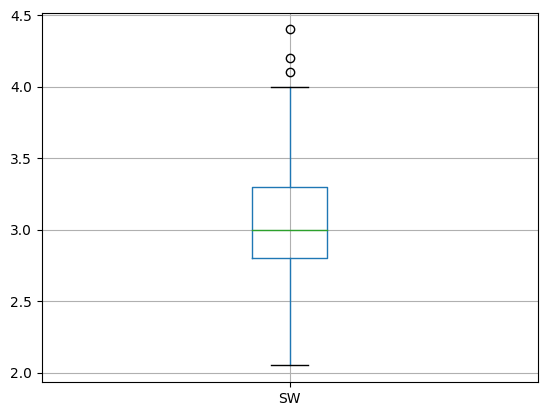

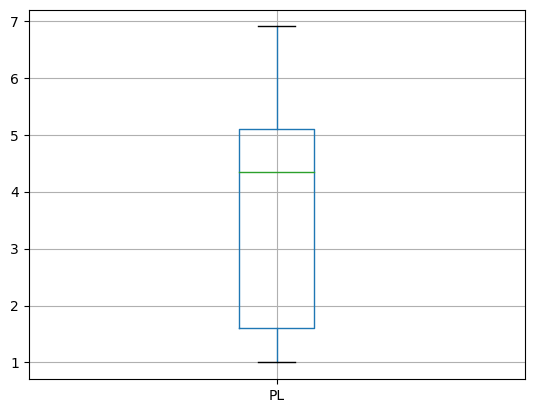

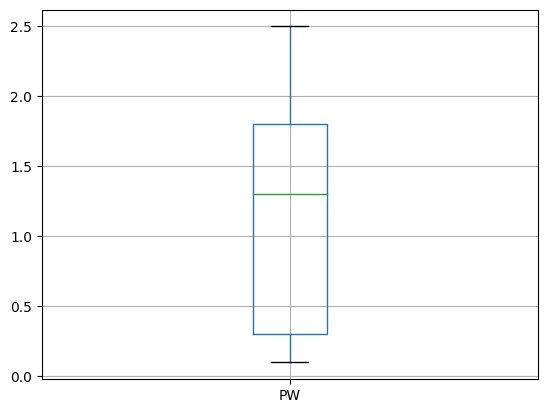

In [9]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    df.boxplot([col])

#5. Filling missing values

In [10]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
df1=df.copy()

In [12]:
for i in ['SL','SW','PL']:
  df1[i]=df1[i].fillna(df1[i].mean())

In [13]:
df1['SL'].fillna(df['SL'].median(),inplace=True)
df1['SW'].fillna(df['SW'].median(),inplace=True)
df1['PL'].fillna(df['PL'].median(),inplace=True)

In [14]:
df1.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049653,3.756250,1.198667
std,0.808480,0.421068,1.725479,0.763161
min,4.300000,2.050000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
df1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


#6. Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [18]:
df1['SL']=scaler.fit_transform(df1[['SL']])
df1['SW']=scaler.fit_transform(df1[['SW']])
df1['PL']=scaler.fit_transform(df1[['PL']])

In [19]:
df1.head()

,SL,SW,PL,PW,Classification
0,-0.938151,1.073118,-1.370138,0.2,Iris-setosa
1,-1.186357,-0.118316,-1.370138,0.2,Iris-setosa
2,0.000000,0.358258,-1.428287,0.2,Iris-setosa
3,-1.558667,0.119971,-1.311989,0.2,Iris-setosa
4,-1.062254,1.311405,-1.370138,0.2,Iris-setosa


#7. Encoding Target Variable 'Classifiation'

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [21]:
df1['Classification']=encoder.fit_transform(df1['Classification'])
df1.head(3)

,SL,SW,PL,PW,Classification
0,-0.938151,1.073118,-1.370138,0.2,0
1,-1.186357,-0.118316,-1.370138,0.2,0
2,0.000000,0.358258,-1.428287,0.2,0


In [22]:
df1.tail()

,SL,SW,PL,PW,Classification
145,1.047500,-0.118316,8.395273e-01,2.3,2
146,0.551088,-1.309750,7.232291e-01,1.9,2
147,0.799294,-0.118316,-2.582338e-16,2.0,2
148,0.426984,0.834831,9.558255e-01,2.3,2
149,0.054675,-0.118316,7.813782e-01,1.8,2


In [23]:
df1['Classification'].unique()

array([0, 1, 2])

#8. Spliting table into target and independent variable

In [24]:
X=df1.drop('Classification',axis=1)
y=df1['Classification']

In [25]:
X.head(3)

,SL,SW,PL,PW
0,-0.938151,1.073118,-1.370138,0.2
1,-1.186357,-0.118316,-1.370138,0.2
2,0.000000,0.358258,-1.428287,0.2


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int64

In [29]:
y.unique()

array([0, 1, 2])

#9. Spliting data for training and testing

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.shape

(120, 4)

In [32]:
X_test.shape

(30, 4)

#10. Classification method-1: Logistic Regreesion

**Creating model**

In [33]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

**Evaluating**

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.9333333333333333


#11. Classification model-2: KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
from sklearn.metrics import accuracy_score

y_pred=knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

#12. Classification model-3: SVC

In [47]:
from sklearn.svm import SVC

svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [48]:
from sklearn.metrics import accuracy_score

y_pred=svc_model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

#13. Classification model-4: Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
from sklearn.metrics import accuracy_score

y_pred=dt_model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

#14. Classification model-5: Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
from sklearn.metrics import accuracy_score

y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

**Result: SVM, Decision Tree and Random Forest all same same accuracy, 1 whereas Logistic regression and KNN has an accuracy of 0.933**